In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set()

In [2]:
N = 100
 
r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
dataA = 26 - r * 10
 
r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r>0])
dataB = 30 - r * 10
 
alldata = np.hstack((dataA, dataB))

conds = np.hstack((np.ones(N), 2 * np.ones(N)))
 
zVals = []
steps = 35

In [3]:
for i in range(100, 5001, steps):
    nPerms = i
    permdiffs = np.zeros(nPerms)
 
    for permi in range(nPerms):
        fconds = np.random.permutation(N*2)
        fconds[fconds<N] = 1
        fconds[fconds>1] = 2
        permdiffs[permi] = np.mean(alldata[fconds == 2]) - np.mean(alldata[fconds == 1])
 
    obsval = np.mean(alldata[conds == 2]) - np.mean(alldata[conds == 1])
 
    # Z-value
    zVal = (obsval - np.mean(permdiffs)) / np.std(permdiffs,ddof=1)
    zVals.append(zVal)
 

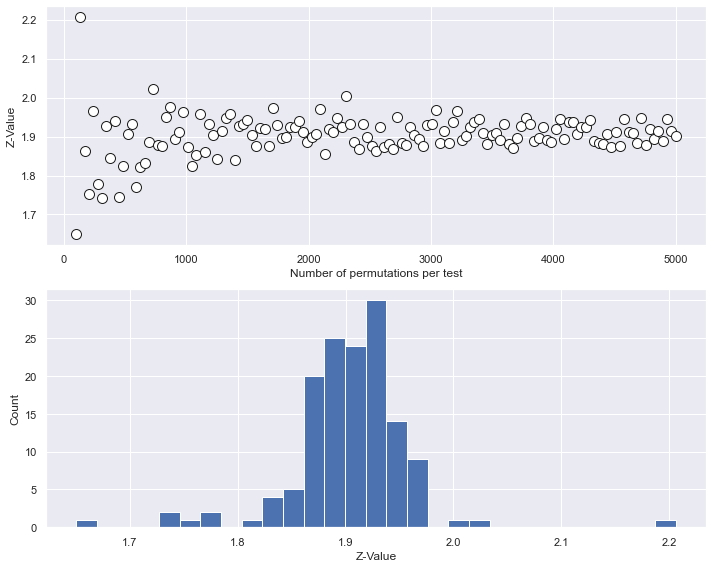

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
 
ax[0].plot(range(100, 5001, steps), zVals, 'ko', markerfacecolor='w', ms=10)
ax[0].set_xlabel("Number of permutations per test")
ax[0].set_ylabel("Z-Value");
 
ax[1].hist(zVals,bins='fd')
ax[1].set_xlabel('Z-Value')
ax[1].set_ylabel('Count')
 
plt.tight_layout()
plt.show()